# <font color='purple'>05-MeanMolecularWeight</font> (template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [8]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. In class: Solar abundances

In the 05-Grevesse.txt file, you will find a tabulation of the solar abundances for the first 30 elements that looks like this:

<div style="width:600px;height:200px;padding:2px;border:1px dotted black;">
<PRE> 
# Abundance from Grevesse					
Z   A       Element   NumberFraction    logAbund    X
1   1.0079  H         1.00E+00          1.20E+01    7.04E-01
2   4.0026  He        1.00E-01          1.10E+01    2.80E-01
3   6.941   Li        1.26E-11          1.10E+00    6.10E-11
4   9.0122  Be        2.51E-11          1.40E+00    1.58E-10
....
</PRE>
</div>

### a. We will first learn how to read in a data file, using a Numpy function

In [9]:
dtype="i8,f8,|U8,f8,f8,f8"
# If using "S8" for the element string, 
# numpy will use bytestring, which need to be decoded
# before using in mathplotlib -- using U8 here instead
url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L05-MeanMolecularWeight/05-Grevesse.txt'
#---------------------------------------
#---------------------------------------
# In class

# How to read a data file
SolAbundance=np.genfromtxt(url,skip_header=1, names=True, dtype=dtype)

### b. Now let's see what the abundance pattern looks like

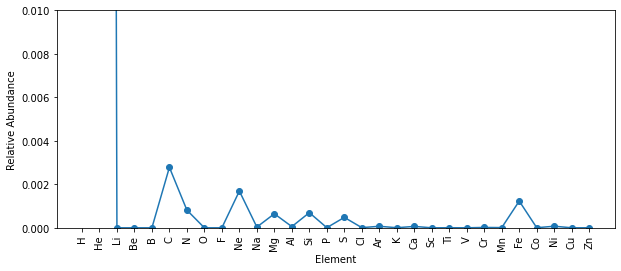

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.set_ylim(0,0.01)

#---------------------------------------
#---------------------------------------
# In class
ax.scatter(SolAbundance['Z'],SolAbundance['X'])
ax.plot(SolAbundance['Z'],SolAbundance['X'])
ax.set_xlabel("Element")
ax.set_ylabel("Relative Abundance")


# We can set the labels in the plots to the name of the elements!
ax.set_xticks(SolAbundance['Z']);
ax.set_xticklabels(SolAbundance['Element'],rotation=90);

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

The above plot shows the relative abundances of each element found within the Sun. Obviously, both Hydrogen and Helium have the highest abundances since they are the primary elements that make up a star's composition. Other "metals" make up a much smaller abundance of the Sun's overall composition. All of them combined adds up to roughly 2% of the total mass of the Sun.

## 2. In class: what is the mean molecular weight for solar abundance?

Let's calculate the value for the mean molecular weight using the $X_i$ in our abundance table. 

We found that:

$$ \frac{1}{\mu} = \frac{1}{\mu_\mathrm{ion}} + \frac{1}{\mu_\mathrm{e}},$$
with

$$ \frac{1}{\mu_\mathrm{ion}} = \sum_i \frac{X_i}{A_i}$$

and

$$ \frac{1}{\mu_\mathrm{e}} = \sum_i \frac{Z_i X_i}{A_i} y_i $$

Let's consider two cases:


### a. The gas is completely neutral

> **TODO**: write a few words about how the equations above can be simplified for a completely neutral gas

***ANSWER***: For a completely neutral gas, $\mu_e$ can be set to 0.

### b. The gas is completely ionized

> **TODO**: write a few words about how the equations above can be simplified for a completely ionized gas

***ANSWER***: For a completely ionized gas, we were able to simply for the expression for $\mu_e$ because the $Y$ mass fraction could be set to 1.

In [23]:
#---------------------------------------
#---------------------------------------
# In class

#For a completely neutral gas, 𝜇_ion=0

mu_e=1/np.sum(SolAbundance['Z']*SolAbundance['X']/SolAbundance['A'])
mu_ion=1/np.sum(SolAbundance['X']/SolAbundance['A'])
neutral_MMW=mu_ion+0
print("The mean molecular weight for a completely neutral gas is:", neutral_MMW,r'm_p')

ionized_MMW=1/(mu_ion)+1/(mu_e)
print("The mean molecular weight for a completely ionized gas is:", 1/ionized_MMW, 'm_p')
print("**m_p=(mass of hydrogen atom)**")

The mean molecular weight for a completely neutral gas is: 1.3005465793861997 m_p
The mean molecular weight for a completely ionized gas is: 0.6205107952580795 m_p
**m_p=(mass of hydrogen atom)**


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

***ANSWER***: As you can see, the mean molecular weight for a completely ionized gas is roughly 1/2 that of a completely neutral gas. The reason for this is because in the ionized case, there are is a higher number of particles that the mass can be distributed amongst. However, in the neutral case, the electrons are bound to the atoms therefore reducing the overall number of available particles.

## 3. At home: What will $\mu$ be at the center of the Sun once all the H is converted into He?

> **TODO**: Make a calulation of the mean molecular weight in the core of the Sun, once all of the hydrogen has been converted into helium (remember, at the surface of the Sun where there is no nuclear reactions: $X$=70%, $Y$=28%, and $Z$=2%)
>
> You can use the approximations I gave in the last slide of the PDF class notes
>
> You can use the code cell below as a calculator, or you can do the calculation by hand.


At the center of the Sun, let's assume that everything is ionized. 

I will also assume that the total mass of the hydrogen was converted into the new total mass of helium (which is not exactly true, as a small fraction of that mass get converted into energy!)

Therefore Y will become X, and X will become zero.

In [24]:
#---------------------------------------
#---------------------------------------
# At home
x=0
y=SolAbundance['X'][0]+SolAbundance['X'][1]

mu_ionized=2/(3*x+(y/2)+1)
print("The mean molecular weight at the center of the Sun for a completely ionized gas if it is all converted to helium is:",mu_ionized, "m_H.*")

The mean molecular weight at the center of the Sun for a completely ionized gas if it is all converted to helium is: 1.3404825737265416 m_H.*


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

Once all the hydrogen in the star has been converted into ionized helium, the mean molecular weight is roughly $1.34m_p$. This number makes sense because the mean molecular weight for ionized hydrogen is roughly $0.6m_p$; which is about half of the $1.34m_p$ value we obtained above. More conceptually, with the absense of all hydrogen, we naturally expect the mean molecular weight to increase since the average mass is higher (even with all the free electrons present). 

## 4. At home: Finally, let's check what the mean molecular weight looks like inside of the sun

### a. Let's use the MESA model to look at $\mu$ as a function of radius inside of the Sun.

> **TODO**: Based on the MESA model for the Sun, I provide an array `mu` that contains the mean molecular weight. Create a plot of the mean molecular weight as a function of $r/R_\star$. The corresponding array for the $r/R_\star$ is called `r_rs`

### b. In the interpretation, explain the shape of the curve

You might find it interesting to look at the variation of the temperature `data['logT']` to help you with your interpretation -- you might find it enlightening!


Text(0, 0.5, '$\\mu_0$')

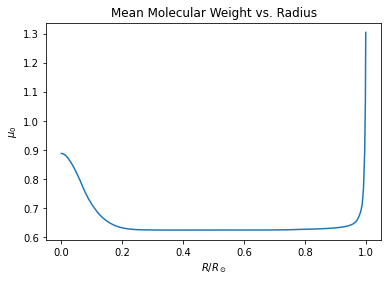

In [13]:
def read_model(file):
    # Here's a function that reads it the MESA model.
    cols = np.array([1,2,3,4,5,9,29,66])-1
    return np.genfromtxt(file, skip_header=5, names=True, usecols = cols)
# Reading the model
data = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L05-MeanMolecularWeight/05-MESAdatafile.txt')

# Calculating mu using the density (in cgs), the temperature (in K) and the gas pressure 
mu = 10**data['logRho'] * u.g / u.cm**3 * const.k_B * 10**data['logT'] * u.K / (10**data['logPgas']*u.Ba) / const.u
mu = mu.decompose() # Should be unitless.

r_rs = 10**(data['logR']-data['logR'][0])

#---------------------------------------
#---------------------------------------
# At home

plt.plot(r_rs,mu)
plt.title("Mean Molecular Weight vs. Radius")
plt.xlabel((r'$R / R_\odot$'))
plt.ylabel(r'$\mu_0$')

Text(0.5, 0, '$R / R_\\odot$')

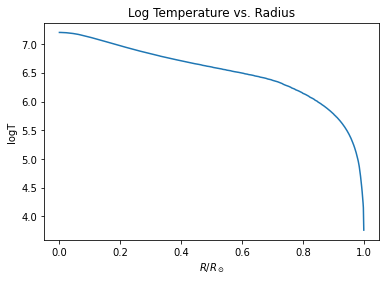

In [14]:
plt.plot(r_rs,data['logT'])
plt.title("Log Temperature vs. Radius")
plt.ylabel("logT")
plt.xlabel(r'$R / R_\odot$')

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

As shown in the first plot above, the mean molecular weight starts off high at the center of the star. As one moves out, the mean molecular weight decreases down to roughly $0.6m_p$. This arises from the fact that the temperature is also decreaasing as you move outward from the center. Then, at the surface, the temperature drops off quite rapidly causing the mean molecular weight to increase rapidly as we move above the surface into the vacuum.

## 5. Reading assignment: "what can we measure about stars" -- part 3
In this graduate course, we are making an advanced physical and mathematical model of star.

But it is still good to learn and/or remind ourselves about which physical characteristics of stars we can actually measure. You might have covered some of this in some details in previous physics or astro courses (at UD PHYS 133, 144, 333, or 469) -- but it is still a good idea to have a quick look at the suggested reading below before crafting your paragraph.

One other thing that can be measured is the composition of a star's surface.

> **TODO**: Have a look at section 5.3 Spectroscopy in Astronomy, 5.4
The Structure of the Atom and/or 5.5 Formation of Spectral Lines of the Open Stack Astronomy online [textbook](https://openstax.org/books/astronomy/pages/5-2-the-electromagnetic-spectrum), and write a short conceptual paragraph about how astronomers can determine the composition of stars through spectra. 

***ANSWER***: As many people know, stars are composed of extremely hot gasses. Being able to determine which gasses make up a star reveal much about its structure, properties, and characteristics. A key tool that is used to analyze these gasses/elements is called spectroscopy. In a very simplistic view, spectroscopy is the study of how light interacts with matter. Therefore, each element has an associated spectra. Astronomers can then use a spectrograph to analyze a star's overall spectrum. From this spectrum, which is considered quasi-"continuous," astronomers can pick out the individual atoms by looking at their unique signatures and comparing them to the overall spectrum.